# Spotify Data Analytics Capstone Project

## 1. Introduction
### In this project, we analyze Spotify data to uncover insights about music trends, user preferences, and song characteristics. 
### The analysis includes EDA, feature distribution, correlation, trends over time, and building predictive models.

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score
import seaborn as sns
warnings.filterwarnings('ignore')

In [4]:
sns.set(style="whitegrid")
plt.rcParams['figure.figsize'] = (12, 6)

In [6]:
data = pd.read_csv("C:/Users/Admin/Desktop/Spotify/data.csv")
data_by_artist = pd.read_csv("C:/Users/Admin/Desktop/Spotify/data_by_artist.csv")
data_by_genres = pd.read_csv("C:/Users/Admin/Desktop/Spotify/data_by_genres.csv")
data_by_year = pd.read_csv("C:/Users/Admin/Desktop/Spotify/data_by_year.csv")
data_w_genres = pd.read_csv("C:/Users/Admin/Desktop/Spotify/data_w_genres.csv")

In [7]:
data.head()

,valence,year,acousticness,artists,danceability,duration_ms,energy,explicit,id,instrumentalness,key,liveness,loudness,mode,name,popularity,release_date,speechiness,tempo
0,0.0594,1921,0.982,"['Sergei Rachmaninoff', 'James Levine', 'Berli...",0.279,831667,0.211,0,4BJqT0PrAfrxzMOxytFOIz,0.878000,10,0.665,-20.096,1,"Piano Concerto No. 3 in D Minor, Op. 30: III. ...",4,1921,0.0366,80.954
1,0.9630,1921,0.732,['Dennis Day'],0.819,180533,0.341,0,7xPhfUan2yNtyFG0cUWkt8,0.000000,7,0.160,-12.441,1,Clancy Lowered the Boom,5,1921,0.4150,60.936
2,0.0394,1921,0.961,['KHP Kridhamardawa Karaton Ngayogyakarta Hadi...,0.328,500062,0.166,0,1o6I8BglA6ylDMrIELygv1,0.913000,3,0.101,-14.850,1,Gati Bali,5,1921,0.0339,110.339
3,0.1650,1921,0.967,['Frank Parker'],0.275,210000,0.309,0,3ftBPsC5vPBKxYSee08FDH,0.000028,5,0.381,-9.316,1,Danny Boy,3,1921,0.0354,100.109
4,0.2530,1921,0.957,['Phil Regan'],0.418,166693,0.193,0,4d6HGyGT8e121BsdKmw9v6,0.000002,3,0.229,-10.096,1,When Irish Eyes Are Smiling,2,1921,0.0380,101.665


In [8]:
print("Shape of data:", data.shape)
data.info()
data.describe()

Shape of data: (170653, 19)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 170653 entries, 0 to 170652
Data columns (total 19 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   valence           170653 non-null  float64
 1   year              170653 non-null  int64  
 2   acousticness      170653 non-null  float64
 3   artists           170653 non-null  object 
 4   danceability      170653 non-null  float64
 5   duration_ms       170653 non-null  int64  
 6   energy            170653 non-null  float64
 7   explicit          170653 non-null  int64  
 8   id                170653 non-null  object 
 9   instrumentalness  170653 non-null  float64
 10  key               170653 non-null  int64  
 11  liveness          170653 non-null  float64
 12  loudness          170653 non-null  float64
 13  mode              170653 non-null  int64  
 14  name              170653 non-null  object 
 15  popularity        170653 non-null  int64

,valence,year,acousticness,danceability,duration_ms,energy,explicit,instrumentalness,key,liveness,loudness,mode,popularity,speechiness,tempo
count,170653.000000,170653.000000,170653.000000,170653.000000,1.706530e+05,170653.000000,170653.000000,170653.000000,170653.000000,170653.000000,170653.000000,170653.000000,170653.000000,170653.000000,170653.000000
mean,0.528587,1976.787241,0.502115,0.537396,2.309483e+05,0.482389,0.084575,0.167010,5.199844,0.205839,-11.467990,0.706902,31.431794,0.098393,116.861590
std,0.263171,25.917853,0.376032,0.176138,1.261184e+05,0.267646,0.278249,0.313475,3.515094,0.174805,5.697943,0.455184,21.826615,0.162740,30.708533
min,0.000000,1921.000000,0.000000,0.000000,5.108000e+03,0.000000,0.000000,0.000000,0.000000,0.000000,-60.000000,0.000000,0.000000,0.000000,0.000000
25%,0.317000,1956.000000,0.102000,0.415000,1.698270e+05,0.255000,0.000000,0.000000,2.000000,0.098800,-14.615000,0.000000,11.000000,0.034900,93.421000
50%,0.540000,1977.000000,0.516000,0.548000,2.074670e+05,0.471000,0.000000,0.000216,5.000000,0.136000,-10.580000,1.000000,33.000000,0.045000,114.729000
75%,0.747000,1999.000000,0.893000,0.668000,2.624000e+05,0.703000,0.000000,0.102000,8.000000,0.261000,-7.183000,1.000000,48.000000,0.075600,135.537000
max,1.000000,2020.000000,0.996000,0.988000,5.403500e+06,1.000000,1.000000,1.000000,11.000000,1.000000,3.855000,1.000000,100.000000,0.970000,243.507000


In [9]:
print("\nMissing values in each column:\n", data.isnull().sum())


Missing values in each column:
 valence             0
year                0
acousticness        0
artists             0
danceability        0
duration_ms         0
energy              0
explicit            0
id                  0
instrumentalness    0
key                 0
liveness            0
loudness            0
mode                0
name                0
popularity          0
release_date        0
speechiness         0
tempo               0
dtype: int64


In [10]:
duplicates = data.duplicated().sum()
print("\nNumber of duplicate rows:", duplicates)
if duplicates > 0:
    data = data.drop_duplicates()


Number of duplicate rows: 0


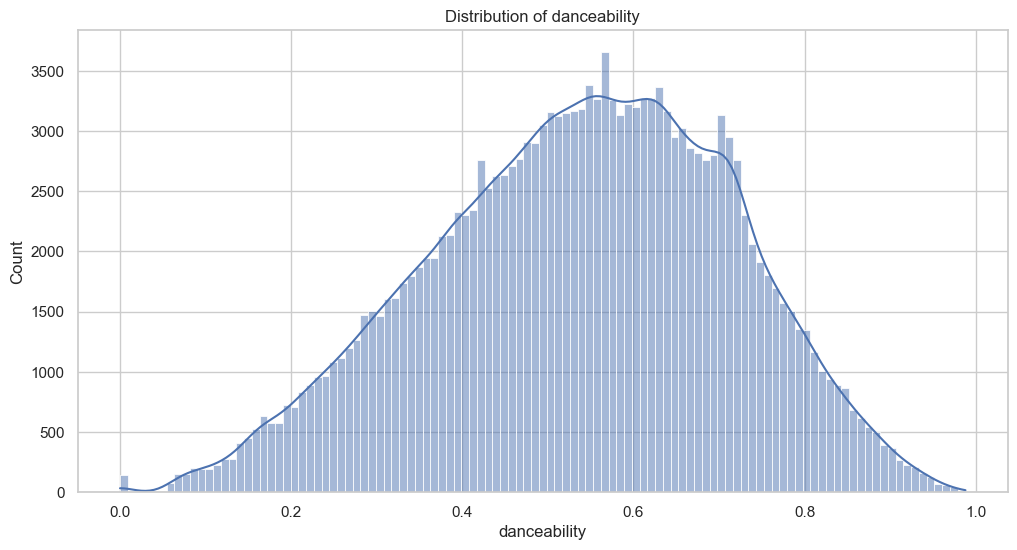

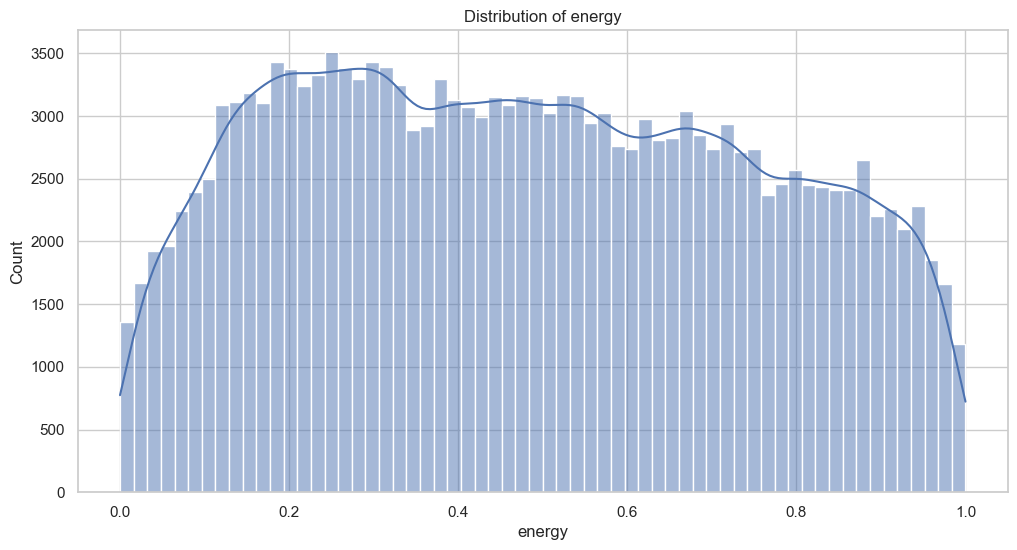

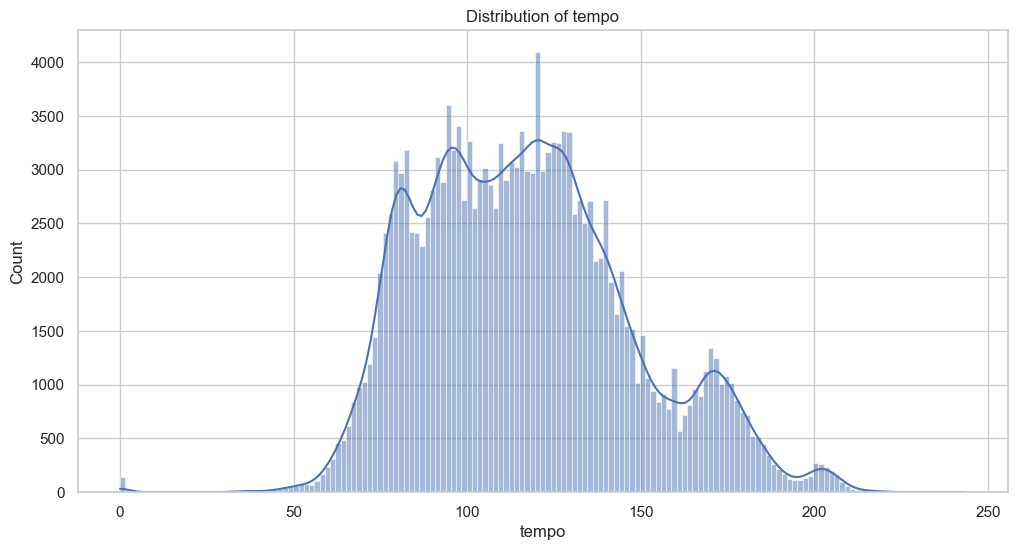

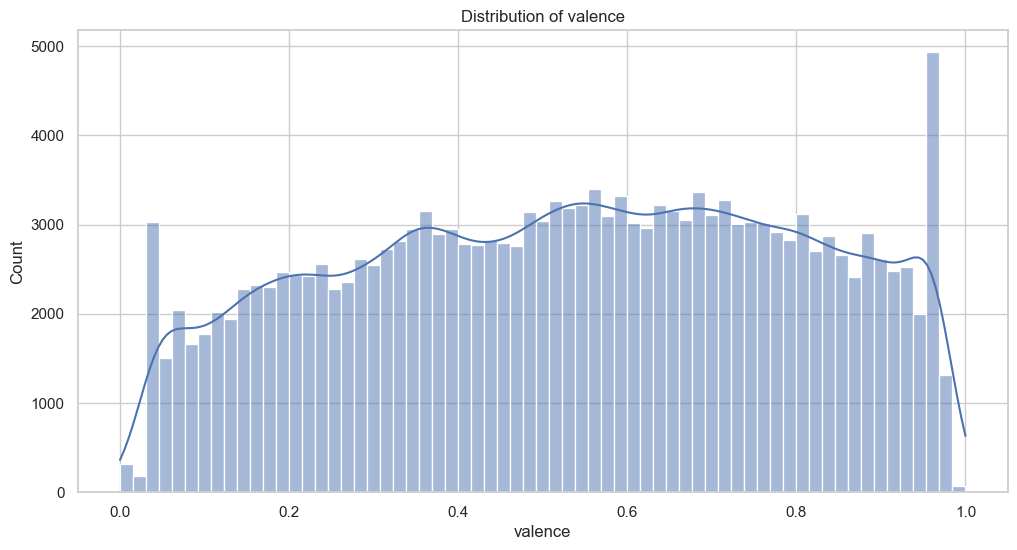

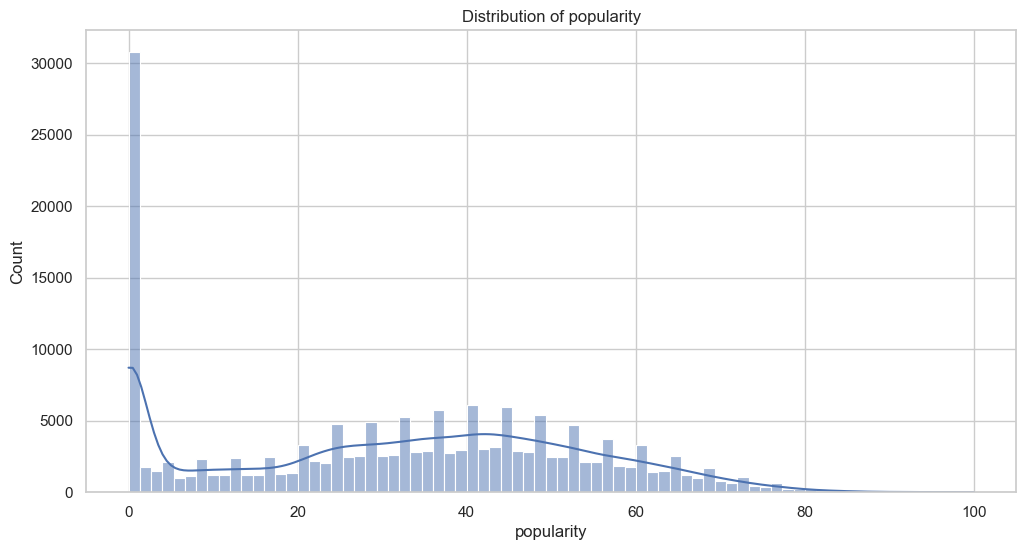

In [11]:
features = ['danceability', 'energy', 'tempo', 'valence', 'popularity']
for feature in features:
    sns.histplot(data[feature], kde=True)
    plt.title(f'Distribution of {feature}')
    plt.xlabel(feature)
    plt.ylabel('Count')
    plt.show()

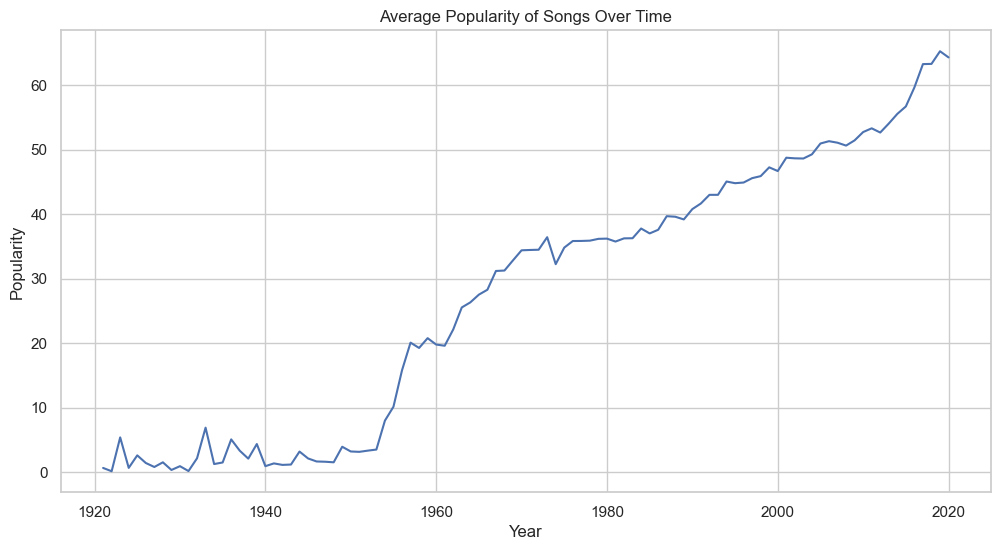

In [12]:
sns.lineplot(x='year', y='popularity', data=data_by_year)
plt.title('Average Popularity of Songs Over Time')
plt.xlabel('Year')
plt.ylabel('Popularity')
plt.show()


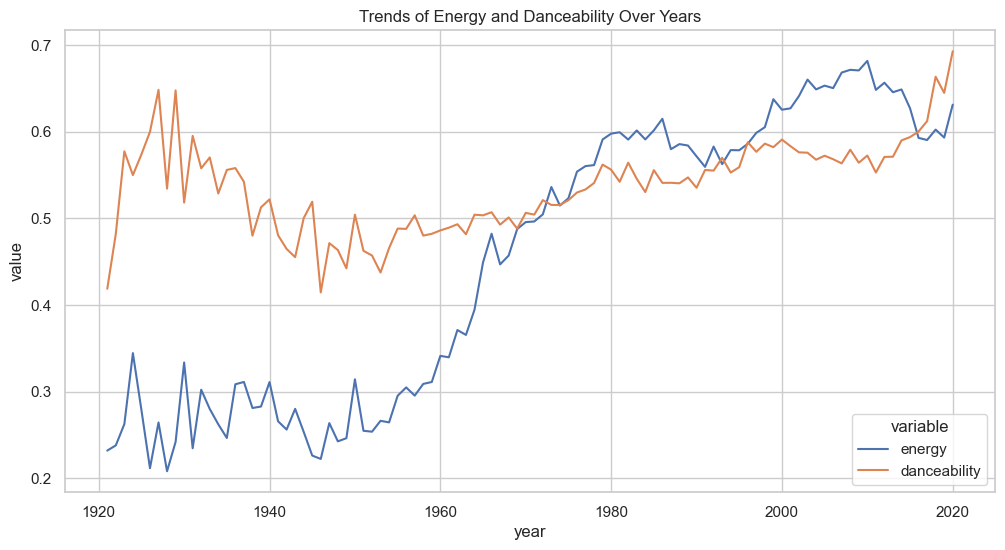

In [13]:
sns.lineplot(data=data_by_year[['year', 'energy', 'danceability']].melt('year'), x='year', y='value', hue='variable')
plt.title('Trends of Energy and Danceability Over Years')
plt.show()


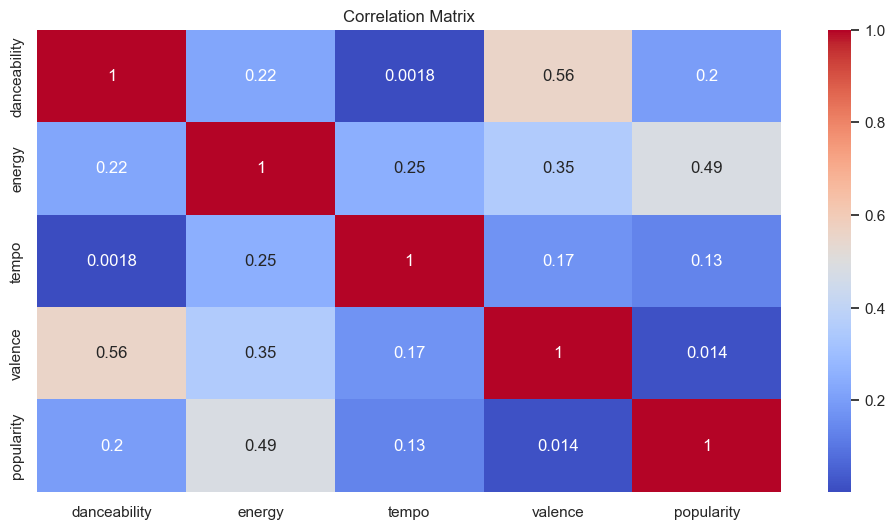

In [14]:
corr = data[features].corr()
sns.heatmap(corr, annot=True, cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()


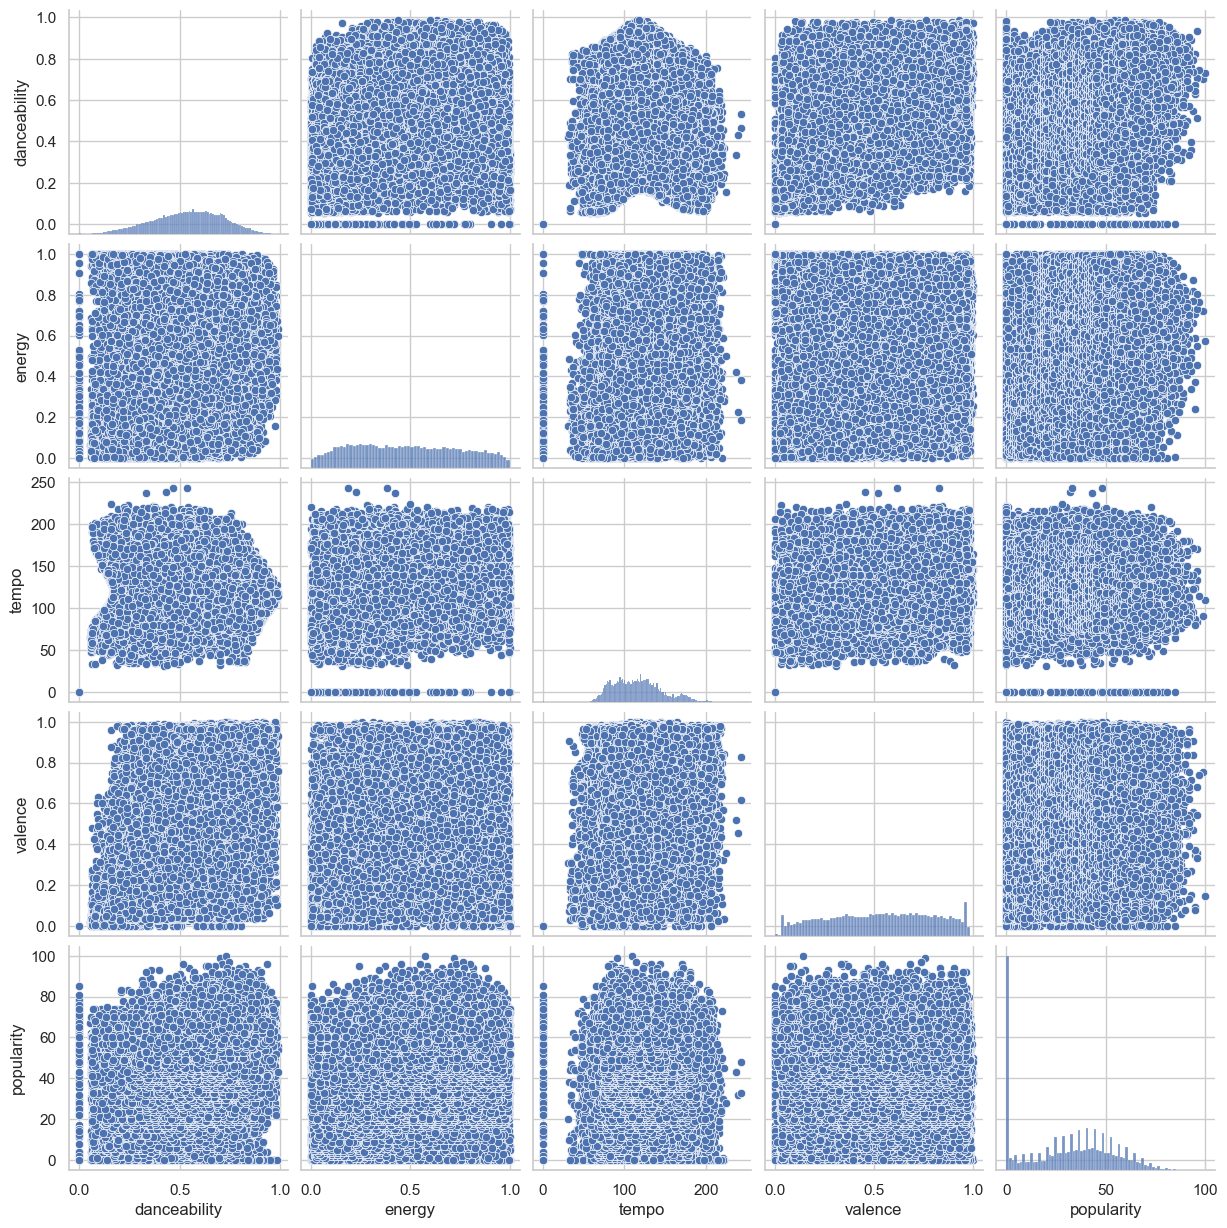

In [17]:
sns.pairplot(data[features].dropna())
plt.show()

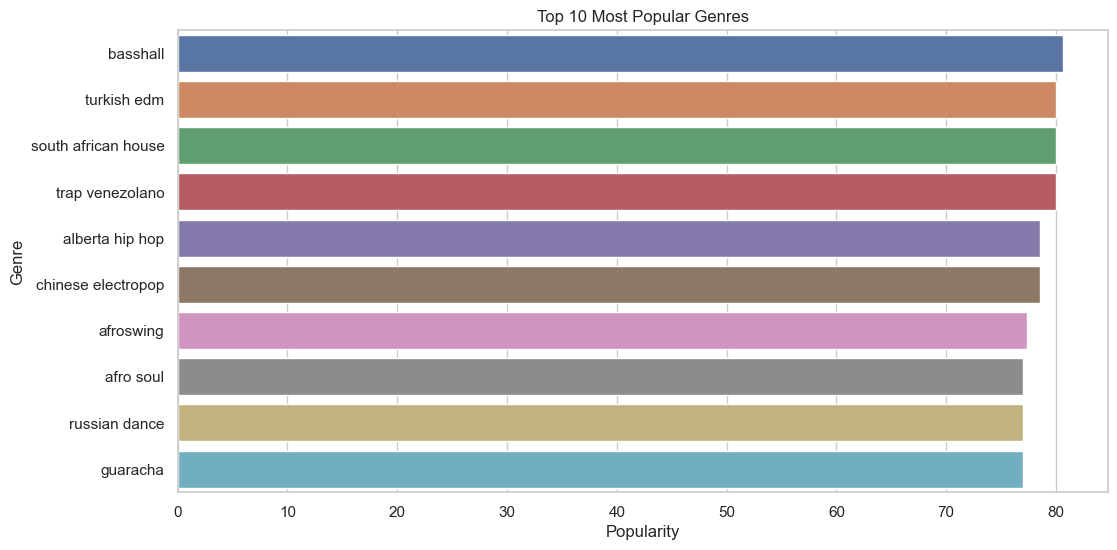

In [18]:
top_genres = data_by_genres.sort_values(by='popularity', ascending=False).head(10)
sns.barplot(y='genres', x='popularity', data=top_genres)
plt.title('Top 10 Most Popular Genres')
plt.xlabel('Popularity')
plt.ylabel('Genre')
plt.show()

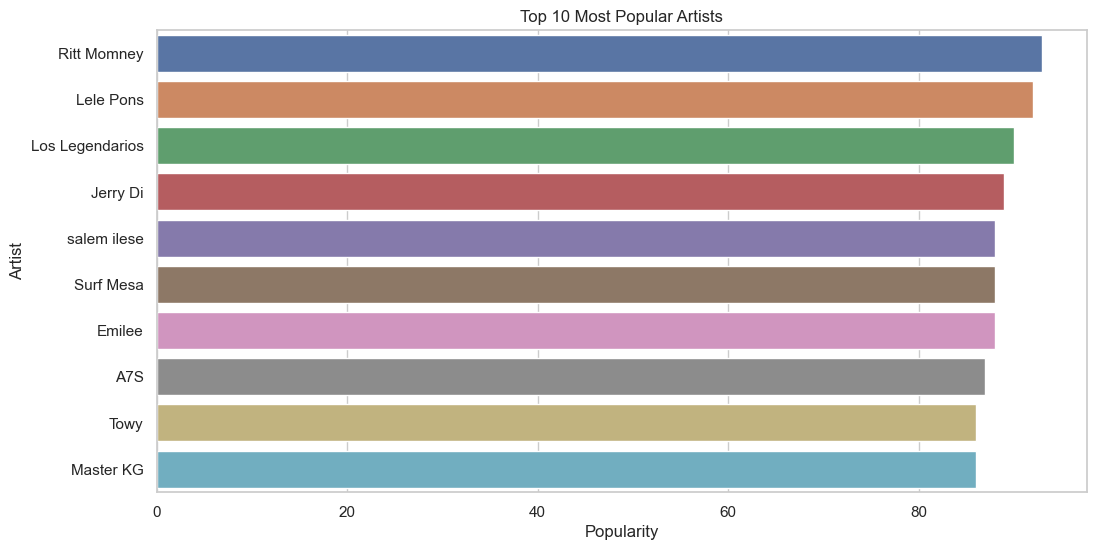

In [19]:
top_artists = data_by_artist.sort_values(by='popularity', ascending=False).head(10)
sns.barplot(y='artists', x='popularity', data=top_artists)
plt.title('Top 10 Most Popular Artists')
plt.xlabel('Popularity')
plt.ylabel('Artist')
plt.show()

In [22]:
model_data = data[['danceability', 'energy', 'tempo', 'valence', 'popularity']].dropna()
X = model_data.drop('popularity', axis=1)
y = model_data['popularity']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
print(f"Train shape: {X_train.shape}, Test shape: {X_test.shape}")

Train shape: (136522, 4), Test shape: (34131, 4)


In [23]:
lr = LinearRegression()
lr.fit(X_train, y_train)
y_pred_lr = lr.predict(X_test)
print("Linear Regression R2 Score:", r2_score(y_test, y_pred_lr))
print("Linear Regression MSE:", mean_squared_error(y_test, y_pred_lr))

Linear Regression R2 Score: 0.3158759195971437
Linear Regression MSE: 327.3651858027804


In [24]:
rf = RandomForestRegressor(n_estimators=100, random_state=42)
rf.fit(X_train, y_train)
y_pred_rf = rf.predict(X_test)
print("Random Forest R2 Score:", r2_score(y_test, y_pred_rf))
print("Random Forest MSE:", mean_squared_error(y_test, y_pred_rf))

Random Forest R2 Score: 0.3761045364037353
Random Forest MSE: 298.54475264404135


In [25]:
# 12. Conclusion
print("\n--- Conclusion ---")
print("1. Danceability and energy are positively correlated.")
print("2. Song popularity has increased over time, with variations in features.")
print("3. Random Forest outperforms Linear Regression for predicting popularity.")
print("4. Genres and artists show significant differences in popularity trends.")


--- Conclusion ---
1. Danceability and energy are positively correlated.
2. Song popularity has increased over time, with variations in features.
3. Random Forest outperforms Linear Regression for predicting popularity.
4. Genres and artists show significant differences in popularity trends.
